In [1]:
# OUR TASK. Import request & beutiful soup
import requests
import bs4
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

def create_soup(url,tag_name):
    page = requests.get(url)
    soup = bs4.BeautifulSoup(page.text,"lxml")
    result = soup.select(tag_name)
    return result

def get_row_label(current_country, current_province):
    if current_province == '':
        result = current_country
    else:
        result = current_country+':-'+current_province
    return result

# SEARCH ITEMS hhhh
def find_exact(dictionary, search_string):
    result = dictionary.get(search_string)
    return result

def find_wildcard(dictionary,search_string):
    output_dictionary={}
    for key,val in dictionary.items():
        if search_string in key:
            output_dictionary[key] = val
    return output_dictionary


def transpose_for_dataframe(covstats_result):
    row_count = len(covstats_result[1])-1
    
    result={}
    headers = covstats_result[2]
    transposed_result = list(map(list, zip(*covstats_result[1])))  
    transposed_result_row_count = len(transposed_result) -1
    
    for n in range(transposed_result_row_count):   
        result.update({headers[n]:transposed_result[n]})
    return result

def transpose_for_dataframe2(covstats_result):
    row_count = len(covstats_result[2])

    result={}
    headers = covstats_result[3]
    transposed_result = list(map(list, zip(*covstats_result[2])))  
    transposed_result_len = len(transposed_result)
    print(row_count)
    print(transposed_result_len)
    #for n in range(row_count):   
     #   print(headers[n])

    

            
def get_covstats(url,tag):
    data = create_soup(url,tag) 
    #Create Resulting List
    country_lookup = []
    simple_list_output=[]
    #Create Header Row
    headers = data[0].getText()
    headers_list = headers.split('\n')
    headers_list_cleaned = headers_list[2:]

    # data[128:140] this will produce 11 rows
    for item in data[1:]:
        item_text = item.getText()
        item_list = item_text.split('\n')
        #item_list[3-5] is limiting the columns for testing purposes
        item_list_cleaned = item_list[2:]
    
        dictionary_row = dict(zip(headers_list_cleaned, item_list_cleaned))

        # put it into summary list
        current_province =  dictionary_row["Province/State"]
        current_country = dictionary_row["Country/Region"] 
        row_label = get_row_label(current_country, current_province)
        item_number = item.key
        #print(item_number)
        #1. build a SET of countries (FOR LOOKUP)
        country_lookup.append(row_label) 
        #3 Build just a list
        simple_list_output.append(item_list_cleaned)
        
    return [country_lookup,  simple_list_output,  headers_list_cleaned]

In [3]:
#Create our Data
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
tag = '.js-file-line'

covstats_result = get_covstats(url,tag)
input_data_for_dataframe = transpose_for_dataframe(covstats_result)


covid_dataframe = DataFrame(input_data_for_dataframe)
covid_dataframe



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
0,,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,46116,46274,46516,46718,46837,46837,47072,47306,47516,47716
1,,Albania,41.1533,20.1683,0,0,0,0,0,0,...,37625,38182,39014,39719,40501,41302,42148,42988,43683,44436
2,,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,82221,83199,84152,85084,85927,86730,87502,88252,88825,89416
3,,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,6712,6745,6790,6842,6904,6955,7005,7050,7084,7127
4,,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,15103,15139,15251,15319,15361,15493,15536,15591,15648,15729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1343,1347,1351,1358,1361,1361,1365,1366,1367,1377
267,,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,83585,85647,88004,90192,92708,94676,96098,98038,99758,101109
268,,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2177,2191,2197,2217,2239,2267,2304,2337,2383,2078
269,,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,17608,17647,17665,17700,17730,17857,17898,17916,17931,17963


In [4]:
#Working with our dataframe
test_dataframe = covid_dataframe

In [5]:
# GET UK
all_uk = test_dataframe.loc[test_dataframe['Country/Region'].isin(['United Kingdom'])]
uk_mainland = all_uk.loc[all_uk['Province/State'].isin([''])]

all_australia = test_dataframe.loc[test_dataframe['Country/Region'].isin(['Australia'])]

sweden = test_dataframe.loc[test_dataframe['Country/Region'].isin(['Sweden'])]


In [6]:
sweden

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
235,,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,243129,243129,260758,266158,272643,278912,278912,278912,278912,297732


In [7]:
uk_mainland

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
261,,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,1617327,1629657,1643086,1659256,1674134,1690432,1705971,1723242,1737960,1750241


In [8]:
# Stack the DataFrames on top of each other
sweden_uk = pd.concat([sweden, uk_mainland],axis=0)
sweden_uk

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20
235,,Sweden,60.128161,18.643501,0,0,0,0,0,0,...,243129,243129,260758,266158,272643,278912,278912,278912,278912,297732
261,,United Kingdom,55.3781,-3.436,0,0,0,0,0,0,...,1617327,1629657,1643086,1659256,1674134,1690432,1705971,1723242,1737960,1750241


In [11]:
# Transpose the Dataframes
transposedData = sweden_uk.transpose()
transposedData

,235,261
Province/State,,
Country/Region,Sweden,United Kingdom
Lat,60.128161,55.3781
Long,18.643501,-3.436
1/22/20,0,0
...,...,...
12/4/20,278912,1690432
12/5/20,278912,1705971
12/6/20,278912,1723242
12/7/20,278912,1737960


In [ ]:
# Data Analysis
#Graph both series

# Let's begin by importing what we'll need (You'll probably be copying and pasting this a lot)

# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [14]:
transposedData

,235,261
Province/State,,
Country/Region,Sweden,United Kingdom
Lat,60.128161,55.3781
Long,18.643501,-3.436
1/22/20,0,0
...,...,...
12/4/20,278912,1690432
12/5/20,278912,1705971
12/6/20,278912,1723242
12/7/20,278912,1737960


In [31]:
# Remove unneeded rows
cropped = transposedData.drop(transposedData.index[[0,2,3]])
cropped


,235,261
Country/Region,Sweden,United Kingdom
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
...,...,...
12/4/20,278912,1690432
12/5/20,278912,1705971
12/6/20,278912,1723242
12/7/20,278912,1737960


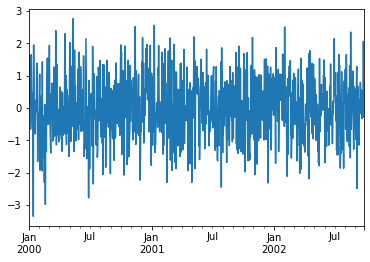

In [47]:
import matplotlib.pyplot as plt
import random

#1. Example of a plot that works (using lists (NOT DATAFRAMES))
ts = pd.Series(np.random.randn(1000),
index=pd.date_range('1/1/2000', periods=1000))
ts.plot()

<Figure size 432x288 with 0 Axes>

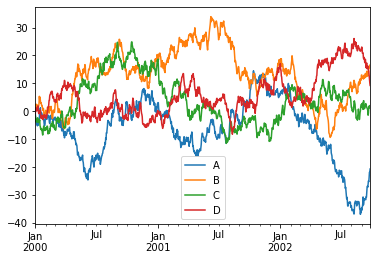

In [52]:
#2. Example of a dataframe plot
#df = DataFrame(randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

In [53]:
df

,A,B,C,D
2000-01-01,-1.033735,0.469001,-1.645109,-0.714006
2000-01-02,-2.618476,1.372903,-2.545787,0.506905
2000-01-03,-2.802866,2.572263,-3.781366,1.297490
2000-01-04,-4.068699,1.754691,-3.402555,0.835245
2000-01-05,-4.495612,2.172595,-3.109197,0.148893
...,...,...,...,...
2002-09-22,-25.229212,15.887432,1.580351,14.317763
2002-09-23,-23.781944,15.515409,1.357839,12.815003
2002-09-24,-21.826754,16.330648,2.040940,11.517580
2002-09-25,-21.765219,16.236609,1.226605,10.259538


In [54]:
cropped

,235,261
Country/Region,Sweden,United Kingdom
1/22/20,0,0
1/23/20,0,0
1/24/20,0,0
1/25/20,0,0
...,...,...
12/4/20,278912,1690432
12/5/20,278912,1705971
12/6/20,278912,1723242
12/7/20,278912,1737960
